<a href="https://colab.research.google.com/github/anguslou/Using-Python-to-automate-Google-Trends-Data/blob/main/Google_Trends_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pytrends

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=d7b5c0d89433e7eaeed3782e0b70dd9b1ec1e0fcb221e6355dd6c2b6734d9586
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b66b5183
Successfully built pytrends


In [2]:
import pandas as pd
from pytrends.request import TrendReq

In [3]:
# https://forbrains.co.uk/international_tools/earth_timezones
# drop the -ve

pytrends = TrendReq(hl='en-US', tz=480)

In [4]:
# pytrends.build_payload(kw_list=['machine learning'])
pytrends.build_payload(kw_list=['apple'], cat=7, timeframe='today 5-y', geo='', gprop='') 
# timeframe to from ex.'2016-12-14 2017-01-25'
# geo two letter country ex.'US'
# gprop filter ex. images, news, youtube or froogle (for Google Shopping results)
# cat filter category, refer to https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories

df = pytrends.interest_by_region() # interest by region
df.sort_values(by=['apple'], ascending=False) # here, i use sorted values

,apple
geoName,
Singapore,100
Hong Kong,84
United States,82
Canada,63
Romania,61
...,...
Guinea-Bissau,0
Guyana,0
Haiti,0


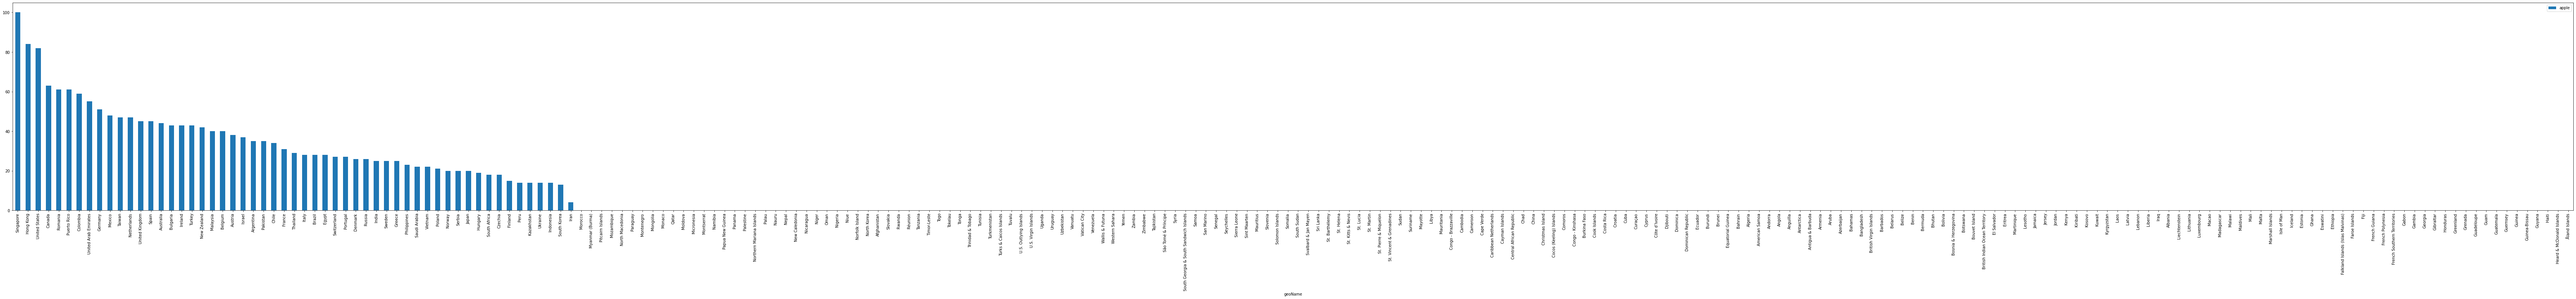

In [6]:
df.reset_index().sort_values(by='apple',ascending=False).plot(x='geoName', y='apple', figsize=(120, 10), kind = 'bar')

In [7]:
df = pytrends.trending_searches(pn='united_states')
df

,0
0,Ramsay Hunt syndrome
1,Rangers
2,Cooper Noriega
3,Inflation
4,Peaky Blinders
5,Julee Cruise
6,Ivanka Trump
7,Popeyes fried chicken 59 cents
8,Judy Garland
9,Austria vs France


In [8]:
df = pytrends.today_searches(pn='US') #IN (india)
df

0     /trends/explore?q=Ramsay+Hunt+syndrome&date=no...
1     /trends/explore?q=Cooper+Noriega&date=now+7-d&...
2         /trends/explore?q=Rangers&date=now+7-d&geo=US
3       /trends/explore?q=Inflation&date=now+7-d&geo=US
4     /trends/explore?q=Peaky+Blinders&date=now+7-d&...
5     /trends/explore?q=Popeyes+fried+chicken+59+cen...
6     /trends/explore?q=Julee+Cruise&date=now+7-d&ge...
7     /trends/explore?q=Ivanka+Trump&date=now+7-d&ge...
8     /trends/explore?q=Judy+Garland&date=now+7-d&ge...
9     /trends/explore?q=USA+vs+Grenada&date=now+7-d&...
10     /trends/explore?q=First+Kill&date=now+7-d&geo=US
11    /trends/explore?q=Demi+Lovato&date=now+7-d&geo=US
12    /trends/explore?q=The+Boys+Season+3+Episode+4&...
13    /trends/explore?q=Scott+Perry&date=now+7-d&geo=US
14    /trends/explore?q=Belmont+Stakes&date=now+7-d&...
15     /trends/explore?q=Baby+Holly&date=now+7-d&geo=US
16    /trends/explore?q=Midnight+Suns&date=now+7-d&g...
17    /trends/explore?q=Ozzy+Osbourne&date=now+7

In [9]:
# get google top charts yearly top search
df = pytrends.top_charts(2021, hl='en-US', tz=300, geo='GLOBAL')
df.head()

,title,exploreQuery
0,Australia vs India,
1,India vs England,
2,IPL,
3,NBA,
4,Euro 2021,


In [10]:
keywords = pytrends.suggestions(keyword='smart watch')
df = pd.DataFrame(keywords)
df.drop(columns='mid') #removing this column as it makes no sense

,title,type
0,Smartwatch,Topic
1,Sony SmartWatch,Watch
2,Apples Never Fall,Topic
3,Haylou Solar LS05,Topic
4,VTech KidiZoom Smartwatch DX2,Topic


In [11]:
pytrends.build_payload(kw_list=['jobs'])

In [12]:
related_queries = pytrends.related_queries()
related_queries.values()

dict_values([{'top':                   query  value
0          jobs near me    100
1                   job     81
2           indeed jobs     78
3                indeed     78
4        part time jobs     45
5             city jobs     36
6           jobs hiring     34
7           jobs online     33
8       government jobs     26
9           amazon jobs     26
10       jobs from home     23
11            best jobs     23
12           steve jobs     20
13             nhs jobs     19
14      craigslist jobs     18
15          google jobs     18
16       work from home     16
17  work from home jobs     16
18            govt jobs     16
19              it jobs     16
20  hiring jobs near me     15
21       hiring near me     15
22          remote jobs     13
23        security jobs     13
24        facebook jobs     12, 'rising':                           query  value
0           amazon jobs near me   3100
1   work from home jobs near me   2000
2          admin or office jobs   1950
3     

In [13]:
related_topic = pytrends.related_topics()
related_topic.values()

dict_values([{'rising':     value formattedValue                                            link  \
0     190          +190%      /trends/explore?q=/m/04pymq&date=today+5-y   
1     110          +110%      /trends/explore?q=/m/014xsg&date=today+5-y   
2      80           +80%      /trends/explore?q=/m/04ctxd&date=today+5-y   
3      70           +70%      /trends/explore?q=/m/05xxpw&date=today+5-y   
4      70           +70%      /trends/explore?q=/m/09ylwk&date=today+5-y   
5      60           +60%     /trends/explore?q=/m/0t53np8&date=today+5-y   
6      60           +60%      /trends/explore?q=/m/018j6p&date=today+5-y   
7      50           +50%  /trends/explore?q=/g/11h7hz8ms4&date=today+5-y   
8      40           +40%      /trends/explore?q=/m/02w88k&date=today+5-y   
9      40           +40%   /trends/explore?q=/g/1q6jdznrb&date=today+5-y   
10     40           +40%      /trends/explore?q=/m/02nzw0&date=today+5-y   
11     40           +40%      /trends/explore?q=/m/02g0j0&date=t